In [3]:
import pandas as pd
import numpy as np

from datetime import datetime, date
from math import *
import json
# %matplotlib inline
from decimal import *
# getcontext().prec = 6
# import re
# from decimal import Decimal

# from os import listdir
# from os.path import isfile, join

import pandas_ta as ta

In [4]:

df = pd.read_csv("/media/grenada/Data/Accounting/pk-crypto-tax-calculator/data-csv/binance/ALGO_USDT-4h.csv"
).set_axis(['ts','open','high','low','close','volume'],axis=1
).assign(ts=lambda x: pd.to_datetime(x['ts'], unit='ms', utc=False)
).set_index('ts')

df

,open,high,low,close,volume
ts,,,,,
2020-09-01 00:00:00,0.5015,0.5212,0.4890,0.5211,6421838.98
2020-09-01 04:00:00,0.5208,0.5536,0.5201,0.5330,14694882.67
2020-09-01 08:00:00,0.5335,0.5357,0.5138,0.5204,4964045.42
2020-09-01 12:00:00,0.5200,0.5239,0.5035,0.5187,5474857.80
2020-09-01 16:00:00,0.5183,0.5355,0.5142,0.5216,5119390.20
...,...,...,...,...,...
2024-01-08 16:00:00,0.1934,0.2006,0.1906,0.1991,12516094.00
2024-01-08 20:00:00,0.1992,0.1995,0.1936,0.1949,7697567.00
2024-01-09 00:00:00,0.1949,0.2032,0.1899,0.1988,29660081.00


In [85]:
df.ta.atr().to_csv('atr.csv')
# df.ta.atr().head(30)

In [42]:
# ta.ema([i+1 for i in range(9)])
# ta.ema(,length=14)
# ta.ema(),length=14)
pd.DataFrame({'close':[i+1 for i in range(200)]}).close.ewm(21).mean().head(50)

0      1.000000
1      1.511628
2      2.031002
3      2.558114
4      3.092953
5      3.635503
6      4.185745
7      4.743659
8      5.309220
9      5.882399
10     6.463166
11     7.051486
12     7.647321
13     8.250633
14     8.861376
15     9.479506
16    10.104973
17    10.737726
18    11.377711
19    12.024870
20    12.679144
21    13.340472
22    14.008789
23    14.684029
24    15.366123
25    16.055001
26    16.750591
27    17.452817
28    18.161604
29    18.876874
30    19.598548
31    20.326544
32    21.060780
33    21.801173
34    22.547637
35    23.300088
36    24.058438
37    24.822599
38    25.592482
39    26.368000
40    27.149061
41    27.935575
42    28.727452
43    29.524600
44    30.326928
45    31.134344
46    31.946757
47    32.764075
48    33.586207
49    34.413060
Name: close, dtype: float64

<Axes: >

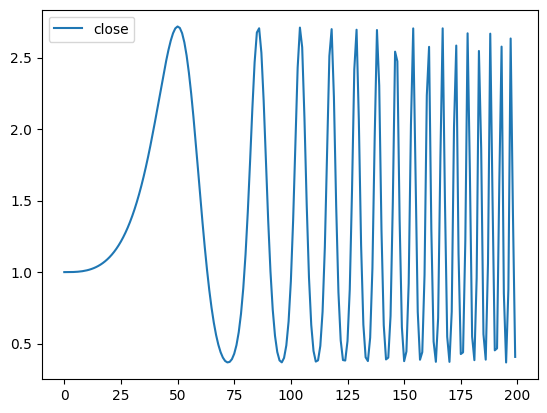

In [63]:

pd.DataFrame({'close':[exp(sin(((i/20)**3/10))) for i in range(200)]}).plot()#.ta.ema(50).plot()

In [6]:
from ta.volatility import average_true_range as atr
# from ta.volatility import tre as atr
 
import pandas as pd

df = pd.read_csv("/media/grenada/Data/Accounting/pk-crypto-tax-calculator/data-csv/binance/ALGO_USDT-4h.csv"
).set_axis(['ts','open','high','low','close','volume'],axis=1
).assign(ts=lambda x: pd.to_datetime(x['ts'], unit='ms', utc=False)
).set_index('ts')

# dir(ta.volatility.AverageTrueRange(df.high,df.low,df.close, window=14))
# df.volatility_atr()
atr(df.high, df.low, df.close).head(100)

ts
2020-09-01 00:00:00    0.000000
2020-09-01 04:00:00    0.000000
2020-09-01 08:00:00    0.000000
2020-09-01 12:00:00    0.000000
2020-09-01 16:00:00    0.000000
                         ...   
2020-09-16 20:00:00    0.014845
2020-09-17 00:00:00    0.015306
2020-09-17 04:00:00    0.014827
2020-09-17 08:00:00    0.014411
2020-09-17 12:00:00    0.014510
Name: atr, Length: 100, dtype: float64

In [106]:
df.head(20)[['high','low','close']].values.T

array([[0.5212, 0.5536, 0.5357, 0.5239, 0.5355, 0.5235, 0.5222, 0.5271,
        0.5116, 0.4749, 0.468 , 0.476 , 0.4716, 0.4507, 0.4489, 0.4158,
        0.41  , 0.4099, 0.3678, 0.3624],
       [0.489 , 0.5201, 0.5138, 0.5035, 0.5142, 0.5129, 0.5051, 0.5035,
        0.4186, 0.442 , 0.4346, 0.4615, 0.4434, 0.426 , 0.4059, 0.377 ,
        0.3901, 0.33  , 0.3412, 0.3343],
       [0.5211, 0.533 , 0.5204, 0.5187, 0.5216, 0.5168, 0.5129, 0.5043,
        0.4588, 0.4532, 0.4665, 0.4638, 0.4451, 0.4412, 0.4133, 0.3969,
        0.3989, 0.3486, 0.3539, 0.345 ]])

In [107]:
df.head(20)[['high','low','close']]


,high,low,close
ts,,,
2020-09-01 00:00:00,0.5212,0.4890,0.5211
2020-09-01 04:00:00,0.5536,0.5201,0.5330
2020-09-01 08:00:00,0.5357,0.5138,0.5204
2020-09-01 12:00:00,0.5239,0.5035,0.5187
2020-09-01 16:00:00,0.5355,0.5142,0.5216
2020-09-01 20:00:00,0.5235,0.5129,0.5168
2020-09-02 00:00:00,0.5222,0.5051,0.5129
2020-09-02 04:00:00,0.5271,0.5035,0.5043
2020-09-02 08:00:00,0.5116,0.4186,0.4588
